In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

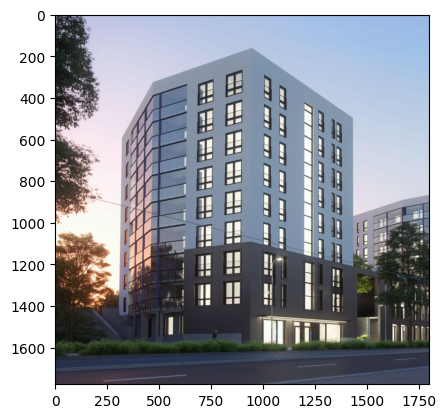

In [2]:
image = cv.imread('images/building1.jpg')
image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
plt.imshow(image)

In [3]:
image.shape

(1777, 1800, 3)

In [4]:
height, width = image.shape[:2]

center_x = width // 2
center_y = height // 2
image_center = (center_x, center_y)

rotation_matrix = cv.getRotationMatrix2D(image_center, 250, 1)
output_image = cv.warpAffine(image, rotation_matrix, (width, height))


(-0.5, 1799.5, 1776.5, -0.5)

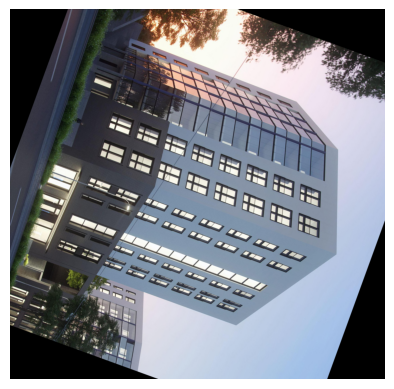

In [5]:
plt.imshow(output_image)
plt.axis('off')

نقاط مبدا و مقصد برای تبدیل Affine

In [6]:
pts1 = np.float32([[width // 2 + 30, height // 2 + 60], 
                   [width // 2 + 30, height // 2 - 60], 
                   [width // 2 - 60, height // 2 - 30]])

pts2 = np.float32([[width // 2 + 60, height // 2 - 30], 
                   [width // 2 - 60, height // 2 - 60], 
                   [width // 2 - 30, height // 2 + 60]])


ماتریس 

In [7]:
affine_matrix = cv.getAffineTransform(pts1, pts2)

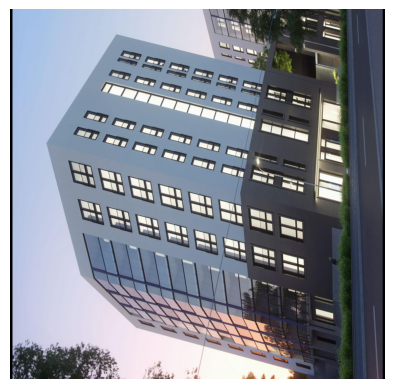

In [8]:
output_width = width 
output_height = height  
affine_transformed = cv.warpAffine(image, affine_matrix, (output_width, output_height))

plt.imshow(affine_transformed)
plt.axis('off')  
plt.show()


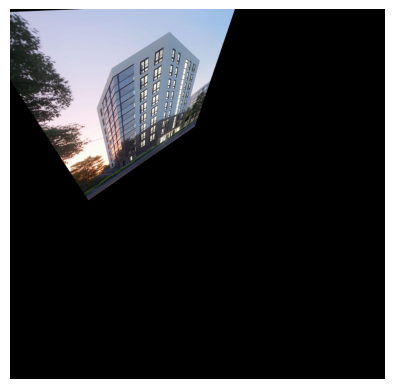

In [9]:
pts1 = np.float32([[100, 100], [300, 100], [100, 300], [300, 300]])
pts2 = np.float32([[50, 150], [300, 120], [150, 350], [350, 300]]) 


perspective_matrix = cv.getPerspectiveTransform(pts1, pts2)

output_width = width 
output_height = height 
perspective_transformed = cv.warpPerspective(image, perspective_matrix, (output_width, output_height))

plt.imshow(perspective_transformed)
plt.axis('off') 
plt.show()